In [1]:
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_excel('../data/motor_vehicles.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 19 columns):
Type                                      23 non-null object
Vehicles Category                         23 non-null object
Type of Vehicles                          23 non-null object
Newly registered-2011-12                  18 non-null float64
Total registered as on 31st March 2012    18 non-null float64
Newly registered-2009-10                  19 non-null float64
Newly registered-2010-11                  19 non-null float64
Total registered as on 31st March-2010    16 non-null float64
Total registered as on 31st March-2011    16 non-null float64
Newly registered-2006-07                  19 non-null float64
Newly registered-2007-08                  18 non-null float64
Newly registered-2008-09                  19 non-null float64
Total registered as on 2007               16 non-null float64
Total registered as on 2008               16 non-null float64
Total registered as on 2009     

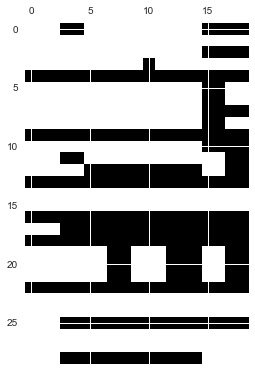

In [3]:
plt.matshow(df.isnull())

In [4]:
def rename(x):
    name = ''
    if 'Total' in x:
        name += 'total_'
        if '.' in x:
            name += x.split('.')[-1]
        elif '-' in x:
            name += x.split('-')[-1]
        else:
            name += x.split(' ')[-1]
    else:
        name += 'reg_'
        last = x.split('-')[-1]
        if last.isdigit():
            if len(last) == 2:
                last = '20'+last
            name += last
        else:
            name = x
    return name
cols = list(map(rename, df.columns))
cols

['Type',
 'Vehicles Category',
 'Type of Vehicles',
 'reg_2012',
 'total_2012',
 'reg_2010',
 'reg_2011',
 'total_2010',
 'total_2011',
 'reg_2007',
 'reg_2008',
 'reg_2009',
 'total_2007',
 'total_2008',
 'total_2009',
 'reg_2005',
 'reg_2006',
 'total_2005',
 'total_2006']

In [6]:
df.columns = cols

dlist = []
for year in map(str,range(2005, 2013)):
    colnames = ['Type',
 'Vehicles Category',
 'Type of Vehicles'] + [i for i in df.columns if year in i]
    part = df[colnames].copy()
    part['Year'] = int(year)
    part.columns = ['Type', 'VehCat', 'VehType', 'Registered', 'Total', 'Year']
    dlist.append(part)
d = pd.concat(dlist)

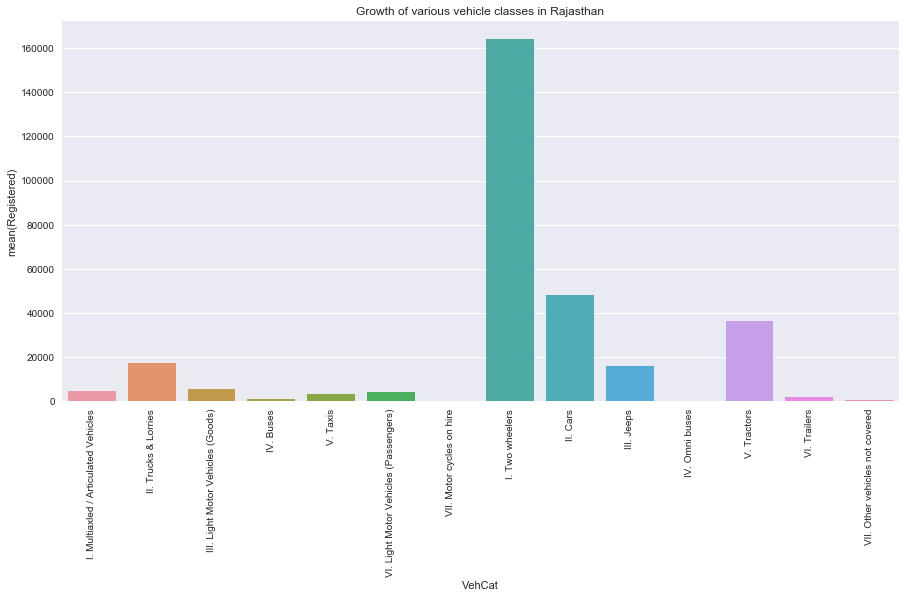

In [20]:
plt.figure(figsize=(15, 7))
sns.barplot(x='VehCat', y='Registered', data=d, linewidth=1, ci=0)
labels = plt.gca().get_xticklabels()
plt.setp(labels, rotation=90)
plt.title('Growth of various vehicle classes in Rajasthan')

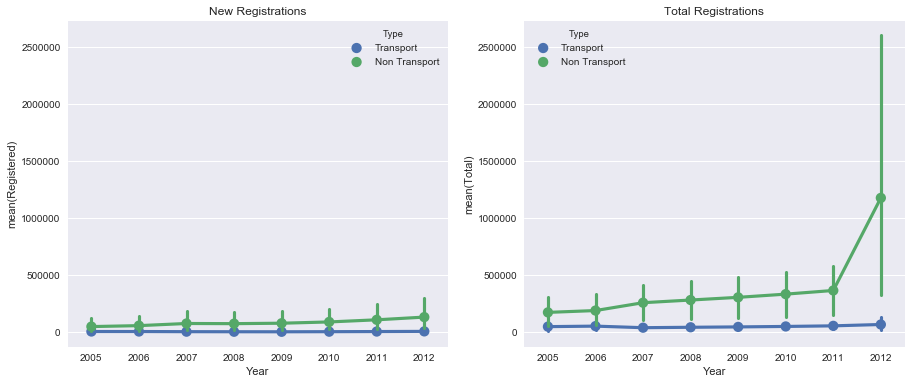

In [19]:
plt.subplots(figsize=(15, 6))

ax1 = plt.subplot(121)
sns.pointplot(x='Year', y='Registered', data=d, hue='Type')
plt.title('New Registrations')

ax2 = plt.subplot(122, sharey=ax1)
sns.pointplot(x='Year', y='Total', data=d, hue='Type')
plt.title('Total Registrations')

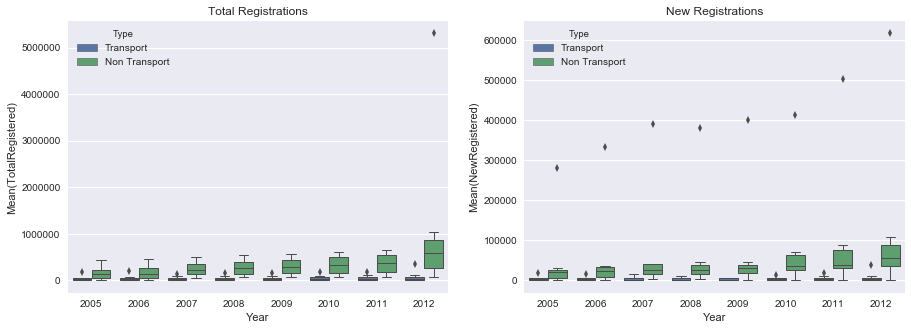

In [16]:
plt.subplots(figsize=(15, 5))

ax1 = plt.subplot(121)
sns.boxplot(x='Year', y='Total', data=d, hue='Type', ax=ax1, linewidth=1)
plt.ylabel('Mean(TotalRegistered)')
plt.title('Total Registrations')

ax2 = plt.subplot(122, sharex=ax1)
sns.boxplot(x='Year', y='Registered', data=d, hue='Type', ax=ax2, linewidth=1)
plt.ylabel('Mean(NewRegistered)')
plt.title('New Registrations')

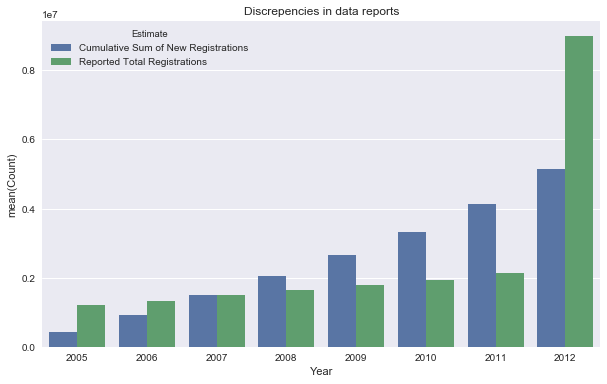

In [75]:
#d['cumReg']
reg = np.cumsum(d.sort_values('Year').groupby('Year')['Registered'].sum())
tot = d.groupby('Year')['Total'].sum()
t = pd.DataFrame({'Year': reg.index, 'Reg': reg.values, 'Tot': tot.values})

datalist = []
t1 = t[['Year', 'Reg']].copy()
t1.columns = ['Year', 'Count']
t1['Estimate'] = 'Cumulative Sum of New Registrations'
datalist.append(t1)

t2 = t[['Year', 'Tot']].copy()
t2.columns = ['Year', 'Count']
t2['Estimate'] = 'Reported Total Registrations'
datalist.append(t2)

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Count', hue='Estimate', data=pd.concat(datalist))
plt.title('Discrepencies in data reports')